In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist


In [10]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

x_train,x_test=x_train/255,x_test/255


In [13]:
models=models.Sequential(
    [

     layers.Flatten(input_shape=(28,28)),
     layers.Dense(128,activation='relu'),
     layers.Dropout(0.2),
     layers.Dense(10,activation='softmax')
    ]
)

models.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

models.fit(x_train,y_train,epochs=5)

test_loss,test_accuracy=models.evaluate(x_test,y_test)





/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8573 - loss: 0.4901
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9543 - loss: 0.1503
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9677 - loss: 0.1079
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9730 - loss: 0.0869
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9779 - loss: 0.0701
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9731 - loss: 0.0877


In [15]:
from huggingface_hub import notebook_login
notebook_login()

In [17]:
models.save("mnist.keras")


In [21]:
from huggingface_hub import HfApi,upload_folder
repo_id="Miravanisri/Mnist-model"
api=HfApi()

api.create_repo(repo_id=repo_id,exist_ok=True)



RepoUrl('https://huggingface.co/Miravanisri/Mnist-model', endpoint='https://huggingface.co', repo_type='model', repo_id='Miravanisri/Mnist-model')

In [22]:
upload_folder(
    folder_path="",
    path_in_repo=".",
    repo_id=repo_id,
    repo_type="model"
)

Processing Files (0 / 0)                : |          |  0.00B /  0.00B            

New Data Upload                         : |          |  0.00B /  0.00B            

  ...t/sample_data/mnist_train_small.csv: 100%|##########| 36.5MB / 36.5MB            

  /content/sample_data/mnist_test.csv   : 100%|##########| 18.3MB / 18.3MB            

  /content/mnist.keras                  :  95%|#########4| 1.18MB / 1.25MB            

CommitInfo(commit_url='https://huggingface.co/Miravanisri/Mnist-model/commit/0f3559a8df869d7521373c00024df53982fc5e84', commit_message='Upload folder using huggingface_hub', commit_description='', oid='0f3559a8df869d7521373c00024df53982fc5e84', pr_url=None, repo_url=RepoUrl('https://huggingface.co/Miravanisri/Mnist-model', endpoint='https://huggingface.co', repo_type='model', repo_id='Miravanisri/Mnist-model'), pr_revision=None, pr_num=None)

In [23]:
from tensorflow import keras
from huggingface_hub import hf_hub_download
path=hf_hub_download(repo_id=repo_id,filename="mnist.keras")
model=keras.models.load_model(path)



mnist.keras:   0%|          | 0.00/1.25M [00:00<?, ?B/s]

In [28]:
ans=model.predict(x_test)
ans[0]



313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([2.8635673e-08, 6.0971983e-10, 4.0542162e-07, 1.7152404e-04,
       9.5026424e-14, 3.4238460e-07, 1.1365427e-14, 9.9982429e-01,
       1.5558736e-06, 1.8967140e-06], dtype=float32)

np.uint8(7)

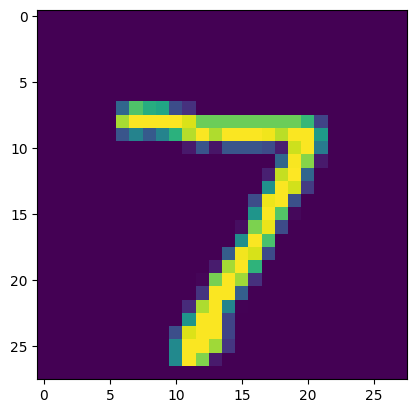

In [32]:
import matplotlib.pyplot as plt

plt.imshow(x_test[0])



